Author: Bruce Chidley
PHIL 870 Final Paper/Project

In [1]:
#Import the necessary packages

import pandas as pd
import numpy as np

import pynetlogo

from SALib.sample import sobol as sobolsample
from SALib.analyze import sobol

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

C:\Users\Bruce Chidley\AppData\Local\Temp\ipykernel_2028\2691220443.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sns.set_style("white")
sns.set_context("talk")

Here, we establishg the link to NetLogo. It is important that the paths are changed to match the install paths of the user.

In [3]:
netlogo = pynetlogo.NetLogoLink(
    gui=False,
    jvm_path = 'C:\\Program Files\\Java\\jdk-21\\bin\\server\\jvm.dll',
    netlogo_home = 'C:/Program Files/NetLogo 6.4.0'
)

In [6]:
#Establish problem, which will be used to generate samples

problem = {
    "num_vars": 5,
    "names": [
        "isolation-rate",
        "bad-actor-proportion",
        "basic-reproductive-ratio",
        "vaccine-infection-factor",
        "mask-infection-factor"
    ],
    "bounds": [
        [0, 0.8],
        [0, 1],
        [3, 7],
        [0.3, 0.5],
        [0.7, 0.95]
    ],
}

In [175]:
#Use sobolsample to generate samples based on problem dict

n = 64
param_values = sobolsample.sample(problem, n, calc_second_order=True)

print(param_values.shape)

(768, 5)


In [179]:
#Load the model in - must change to match each user's path

netlogo.load_model("C:/Users/Bruce Chidley/Documents/PHIL 870/individual_project/kingston_disease.nlogo")

In [180]:
#results will store the mean values for each class at simulation equilibrium

results = pd.DataFrame(columns=['Total Susceptible Count', 'Total Exposed Count', 'Total Infectious Count', 'Total Recovered Count'])

In [181]:
#Loops for all parameter configurations

for run in range(param_values.shape[0]):

    print(run)

    # et the input parameters
    for i, name in enumerate(problem["names"]):
        if name == "random-seed":
            #The NetLogo random seed requires a different syntax
            netlogo.command("random-seed {}".format(param_values[run, i]))
        else:
            #Otherwise, assume the input parameters are global variables
            netlogo.command("set {0} {1}".format(name, param_values[run, i]))

    netlogo.command("setup")

    #Run for 500 steps
    counts = netlogo.repeat_report(['total-susceptible-count', 'total-exposed-count', 'total-infectious-count', 'total-recovered-count'], 500, include_t0=True)

    #For each run, save the mean from step 250-500, which is where equilibrium typically lies
    results.loc[run, "Total Susceptible Count"] = (counts["total-susceptible-count"][250:]).mean()
    results.loc[run, "Total Exposed Count"] = (counts["total-exposed-count"][250:]).mean()
    results.loc[run, "Total Infectious Count"] = (counts["total-infectious-count"][250:]).mean()
    results.loc[run, "Total Recovered Count"] = (counts["total-recovered-count"][250:]).mean()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Here, we are saving and reading results from csv files for ease of processing

In [182]:
#results.to_csv("Sobol_sequential_disease_none.csv")
#results.to_csv("Sobol_sequential_disease_masking.csv")
#results.to_csv("Sobol_sequential_disease_vaccination.csv")
#results.to_csv("Sobol_sequential_disease_isolation.csv")
#results.to_csv("Sobol_sequential_disease_all_three.csv")

In [11]:
#results = pd.read_csv("Sobol_sequential_disease_none.csv", header=0, index_col=0)
#results = pd.read_csv("Sobol_sequential_disease_masking.csv", header=0, index_col=0)
#results = pd.read_csv("Sobol_sequential_disease_vaccination.csv", header=0, index_col=0)
#results = pd.read_csv("Sobol_sequential_disease_isolation.csv", header=0, index_col=0)
results = pd.read_csv("Sobol_sequential_disease_all_three.csv", header=0, index_col=0)

In [209]:
results.head(5)

,Total Susceptible Count,Total Exposed Count,Total Infectious Count,Total Recovered Count
0,940.498008,14.155378,25.868526,24.478088
1,566.119522,103.505976,178.952191,156.422311
2,193.494024,190.924303,331.545817,289.035857
3,1004.498008,0.000000,0.099602,0.402390
4,827.960159,41.713147,72.003984,63.322709


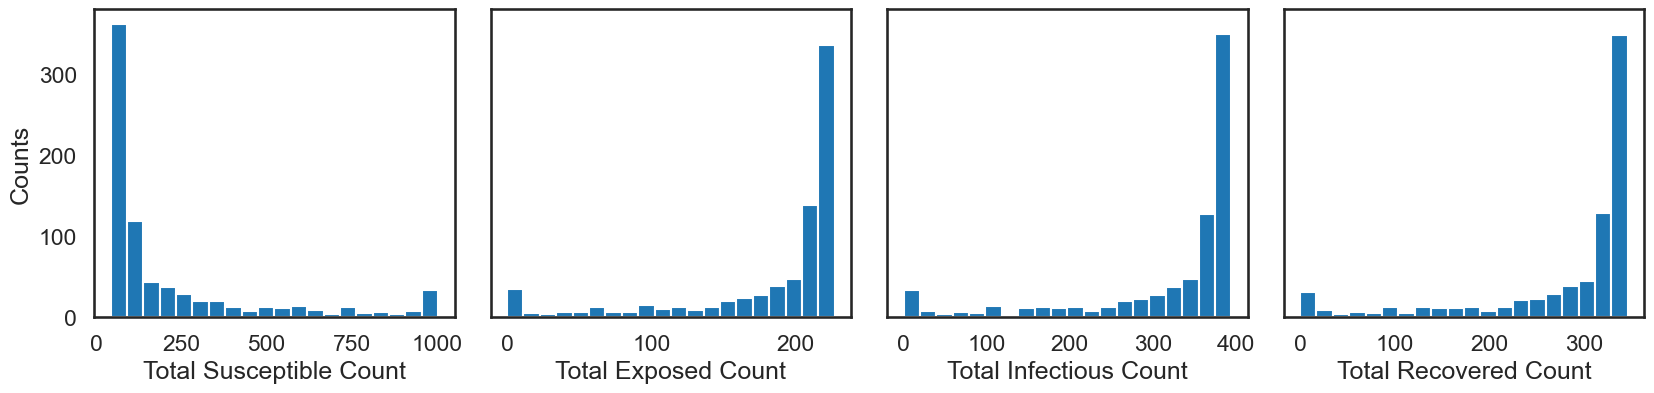

In [4]:
fig, ax = plt.subplots(1, len(results.columns), sharey=True)

for i, n in enumerate(results.columns):
    ax[i].hist(results[n], 20)
    ax[i].set_xlabel(n)
ax[0].set_ylabel("Counts")

fig.set_size_inches(20, 4)
fig.subplots_adjust(wspace=0.1)

#plt.savefig("counts_none", bbox_inches = "tight")
plt.show()

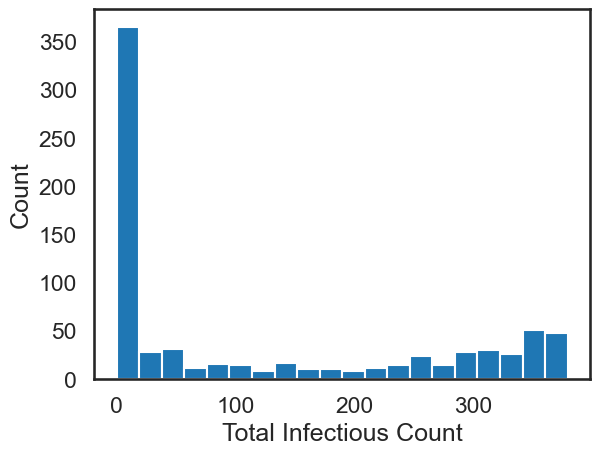

In [12]:
plt.hist(results["Total Infectious Count"], 20)
plt.xlabel("Total Infectious Count")
plt.ylabel("Count")

#plt.savefig("infectious_counts_all_three", bbox_inches = "tight")
plt.show()

Similarly, we save and read pickle files of the parameter configurations

In [186]:
#pickle.dump(param_values, open("param_values_none.p", "wb" ))
#pickle.dump(param_values, open("param_values_mask.p", "wb" ))
#pickle.dump(param_values, open("param_values_vaccine.p", "wb" ))
#pickle.dump(param_values, open("param_values_isolation.p", "wb" ))
#pickle.dump(param_values, open("param_values_all_three.p", "wb" ))

In [242]:
#param_values = pd.read_pickle(r'param_values_none.p')
#param_values = pd.read_pickle(r'param_values_mask.p')
#param_values = pd.read_pickle(r'param_values_vaccine.p')
#param_values = pd.read_pickle(r'param_values_isolation.p')
param_values = pd.read_pickle(r'param_values_all_three.p')

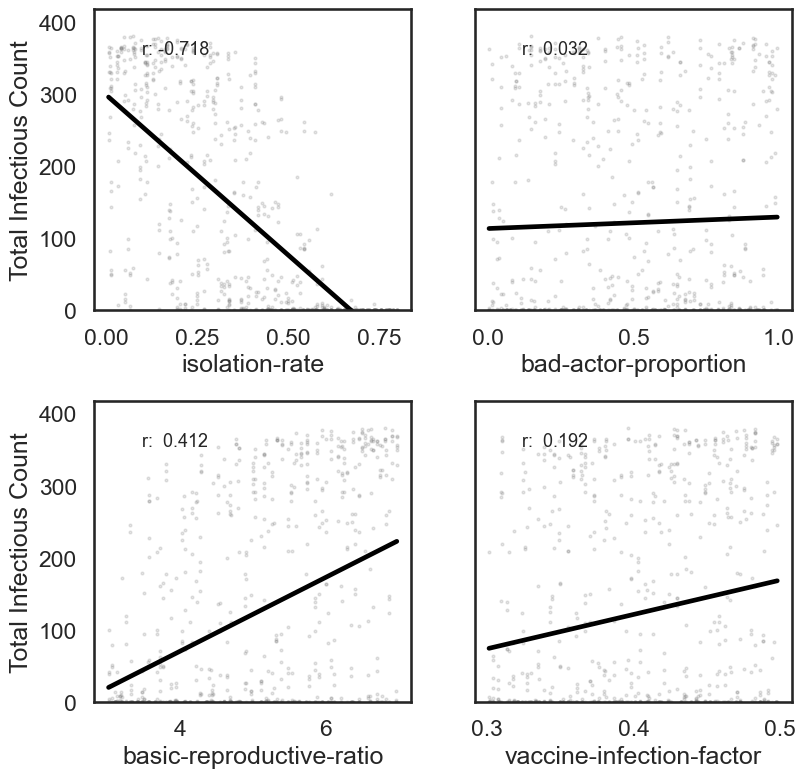

In [243]:
import scipy

nrow = 2
ncol = 2

fig, ax = plt.subplots(nrow, ncol, sharey=True)

y = results["Total Infectious Count"]

for i, a in enumerate(ax.flatten()):
    x = param_values[:, i]
    sns.regplot(
        x=x,
        y=y,
        ax=a,
        ci=None,
        color="k",
        scatter_kws={"alpha": 0.2, "s": 4, "color": "gray"},
    )
    pearson = scipy.stats.pearsonr(x, y)
    a.annotate(
        "r: {:6.3f}".format(pearson[0]),
        xy=(0.15, 0.85),
        xycoords="axes fraction",
        fontsize=13,
    )
    if divmod(i, ncol)[1] > 0:
        a.get_yaxis().set_visible(False)
    a.set_xlabel(problem["names"][i])
    a.set_ylim([0, 1.1 * np.max(y)])

fig.set_size_inches(9, 9, forward=True)
fig.subplots_adjust(wspace=0.2, hspace=0.3)

plt.savefig("graphs_all_three.png")

plt.show()

In [244]:
#Perform the sobol analysis

Si = sobol.analyze(
    problem,
    results["Total Infectious Count"].values,
    calc_second_order=True,
    print_to_console=False,
)

In [247]:
Si

{'S1': array([ 0.4764323 , -0.01371352,  0.24329639, -0.00178887,  0.02886705]),
 'S1_conf': array([0.28597287, 0.02444237, 0.18980384, 0.07602898, 0.09200175]),
 'ST': array([0.7668551 , 0.0088442 , 0.34070129, 0.04783703, 0.06496421]),
 'ST_conf': array([0.27731568, 0.00723813, 0.15510803, 0.02666452, 0.03374647]),
 'S2': array([[        nan,  0.12299049,  0.05554705,  0.14393155,  0.13092775],
        [        nan,         nan,  0.01455255,  0.02719669,  0.02363335],
        [        nan,         nan,         nan, -0.04040552, -0.01302349],
        [        nan,         nan,         nan,         nan,  0.0587376 ],
        [        nan,         nan,         nan,         nan,         nan]]),
 'S2_conf': array([[       nan, 0.24774252, 0.28122973, 0.25419542, 0.2860385 ],
        [       nan,        nan, 0.03568167, 0.03461037, 0.03638115],
        [       nan,        nan,        nan, 0.2377002 , 0.22505973],
        [       nan,        nan,        nan,        nan, 0.12016532],
       

In [245]:
#Here, we make the data more workable

Si_filter = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
Si_df = pd.DataFrame(Si_filter, index=problem["names"])

Si_df

,ST,ST_conf,S1,S1_conf
isolation-rate,0.766855,0.277316,0.476432,0.285973
bad-actor-proportion,0.008844,0.007238,-0.013714,0.024442
basic-reproductive-ratio,0.340701,0.155108,0.243296,0.189804
vaccine-infection-factor,0.047837,0.026665,-0.001789,0.076029
mask-infection-factor,0.064964,0.033746,0.028867,0.092002


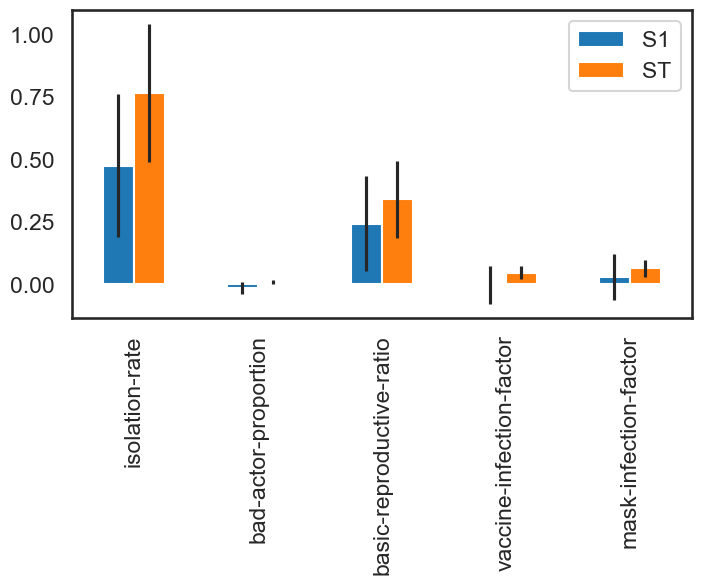

In [246]:
#Graph the sensitivity indices

fig, ax = plt.subplots(1)

indices = Si_df[["S1", "ST"]]
err = Si_df[["S1_conf", "ST_conf"]]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(8, 4)

plt.savefig("sobol_graph_all_three.png", bbox_inches = "tight")
plt.show()